# Lista 2: Execício 3

SEL0367 - Controle Adaptativo

> Aluno: Felipe Andrade Garcia Tommaselli- 11800910 

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import control.matlab as matlab

Planta do sistema: 
$y = \frac{s + a_2}{s^2 + 3 \cdot s + a_0} \cdot u$


In [47]:
# Parametros
a2 = 5
a0 = 2

In [48]:
# Definição das funções de transferência do sistema
s = matlab.tf('s')

ftx1 = (s + a2)/(s**2 + 3*s + a0)
ftx2 = (s**2)*ftx1 + (3*s)*ftx1 - (s)
ftx3 = 1

lb = s**2 + 2*s + 1
ftx1 /= lb
ftx2 /= lb
ftx3 /= lb

ftx2

TransferFunction(array([ 5, 28, 49, 26,  0]), array([ 1,  8, 26, 44, 41, 20,  4]))

In [49]:
# Parâmetros de simulação
N = 100
dt = 0.01  # Taxa de amostragem
T = np.arange(0, N + dt, dt)
u = 10*np.cos(T+ (np.pi/7)) + 9*np.sin(2*T) # entrada

len(T)

10001

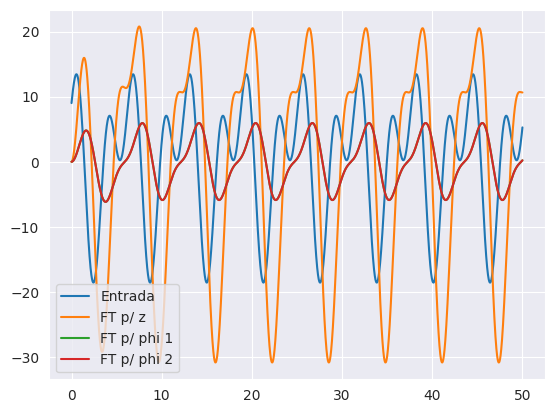

In [50]:
# Simulação dos modelos
z, T, _  = matlab.lsim(ftx2, u, T)
phi1, T, _ = matlab.lsim(ftx3, u, T)
phi2, T, _ = matlab.lsim(ftx1, u, T)


# Plotagem dos resultados juntos
corte = int(np.ceil(0.5*len(T)))
plt.plot(T[:corte], u[:corte], label='Entrada')
plt.plot(T[:corte], z[:corte], label='FT p/ z')
plt.plot(T[:corte], phi1[:corte], label='FT p/ phi 1')
plt.plot(T[:corte], phi1[:corte], label='FT p/ phi 2')

plt.legend()
plt.show()

In [51]:
theta = np.zeros((2, int(N/dt) + 1))  # Matriz para armazenar os parâmetros estimados
theta[:, 0] = [0, 0]
erro = np.zeros(int(N/dt) + 1)  # Vetor de erros

gama = np.array([[10, 0], [0, 1]])  # Matriz de ajuste

In [52]:
# Loop de iterações para o algoritmo adaptativo
for k in range(0, int(N/dt)): 
    # Construção do vetor phi
    phi = np.array([[phi1[k]], [phi2[k]]])
    
    # Cálculo de ms (fator de ajuste)
    ms = 1 + 0.1 * np.dot(phi.T, phi)[0, 0]

    # Atualização dos parâmetros estimados usando o algoritmo adaptativo
    erro[k+1] = (z[k] - np.dot(theta[:, k].T, phi))[0] / ms
    delta_theta = (dt * np.dot(gama, erro[k+1] * phi) / ms).reshape((2,))
    theta[:, k+1] = theta[:, k] + delta_theta

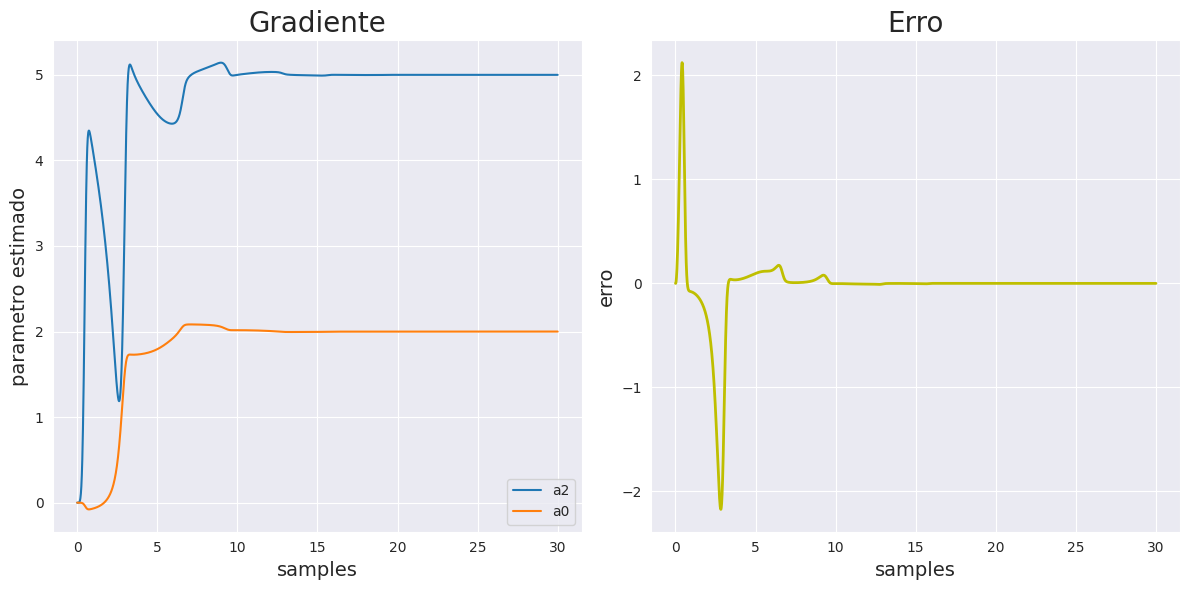

In [54]:
# Gráfico dos parâmetros identificados e do erro

# Crie uma figura com 1 linha e 2 colunas para os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

corte = int(np.ceil(0.3*len(theta[0])))

fontesize = 14
titlesize = 20
# Primeiro subplot (Gráfico dos parâmetros estimados)
axs[0].plot(T[:corte], theta[0, :][:corte], label='a2')
axs[0].plot(T[:corte], -1 * theta[1, :][:corte], label='a0')
axs[0].legend()
axs[0].set_xlabel('samples', fontsize=fontesize)
axs[0].set_ylabel('parametro estimado', fontsize=fontesize)
axs[0].set_title('Gradiente', fontsize=titlesize)

# Segundo subplot (Gráfico do erro)
axs[1].plot(T[:corte], erro[:corte], 'y', linewidth=2)
axs[1].set_xlabel('samples', fontsize=fontesize)
axs[1].set_ylabel('erro', fontsize=fontesize)
axs[1].set_title('Erro', fontsize=titlesize)
axs[1].grid(True)

# Ajuste o espaço entre os subplots
plt.tight_layout()

# Exiba os subplots lado a lado
plt.show()